# **Image Data Augmentation**


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# !wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp
!wget -O Batman.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg

--2023-03-14 05:48:49--  https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.0.228.138, 2600:1408:5400:38c::f33, 2600:1408:5400:395::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.0.228.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24770 (24K) [image/jpeg]
Saving to: ‘Batman.jpg’

Batman.jpg          100%[===================>]  24.19K  --.-KB/s    in 0.007s  

2023-03-14 05:48:50 (3.47 MB/s) - ‘Batman.jpg’ saved [24770/24770]



In [4]:
image_org = load_img("Batman.jpg")
image = img_to_array(image_org)
image.shape  # height, width, depth

(360, 640, 3)

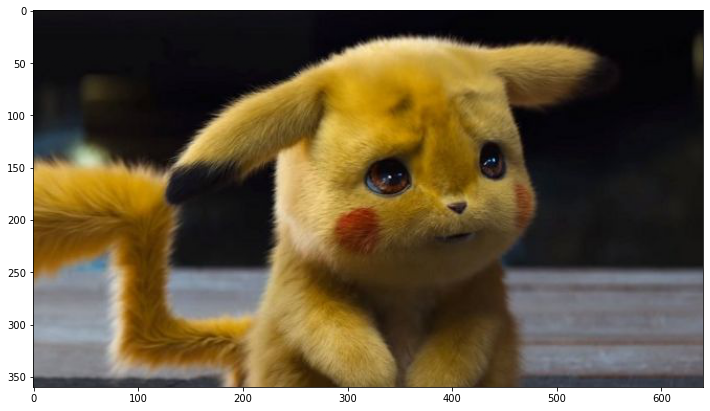

In [5]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [6]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [7]:
image.shape

(1, 360, 640, 3)

## **ImageDataGenerator**

[전체 옵션 참고](https://keras.io/preprocessing/image/)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
aug = ImageDataGenerator(rotation_range=50,      # 이미지 회전
                         width_shift_range=0.3,  # 이미지 좌우 이동
                         height_shift_range=0.3, # 이미지 상하 이동
                         zoom_range=0.8,         # 확대/축소 범위
                         shear_range=0.5,        # 비스듬히 늘림
                        #  horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [11]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [12]:
!mkdir output

In [13]:
!ls output

In [14]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [15]:
!ls output

image_0_124.jpg   image_0_3380.jpg  image_0_495.jpg   image_0_8563.jpg
image_0_1899.jpg  image_0_3708.jpg  image_0_5586.jpg  image_0_8568.jpg
image_0_1918.jpg  image_0_4165.jpg  image_0_7313.jpg  image_0_9564.jpg
image_0_1960.jpg  image_0_422.jpg   image_0_773.jpg   image_0_985.jpg
image_0_228.jpg   image_0_473.jpg   image_0_7926.jpg  image_0_999.jpg


In [16]:
import os

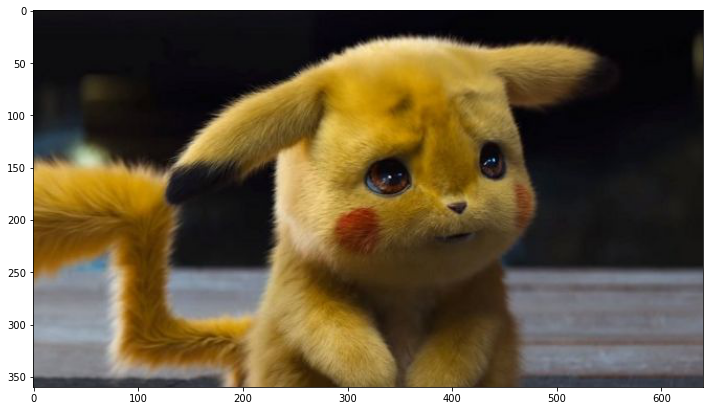

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(image_org) # 아까 것과의 차이는?
plt.show()

In [ ]:
os.listdir('output')

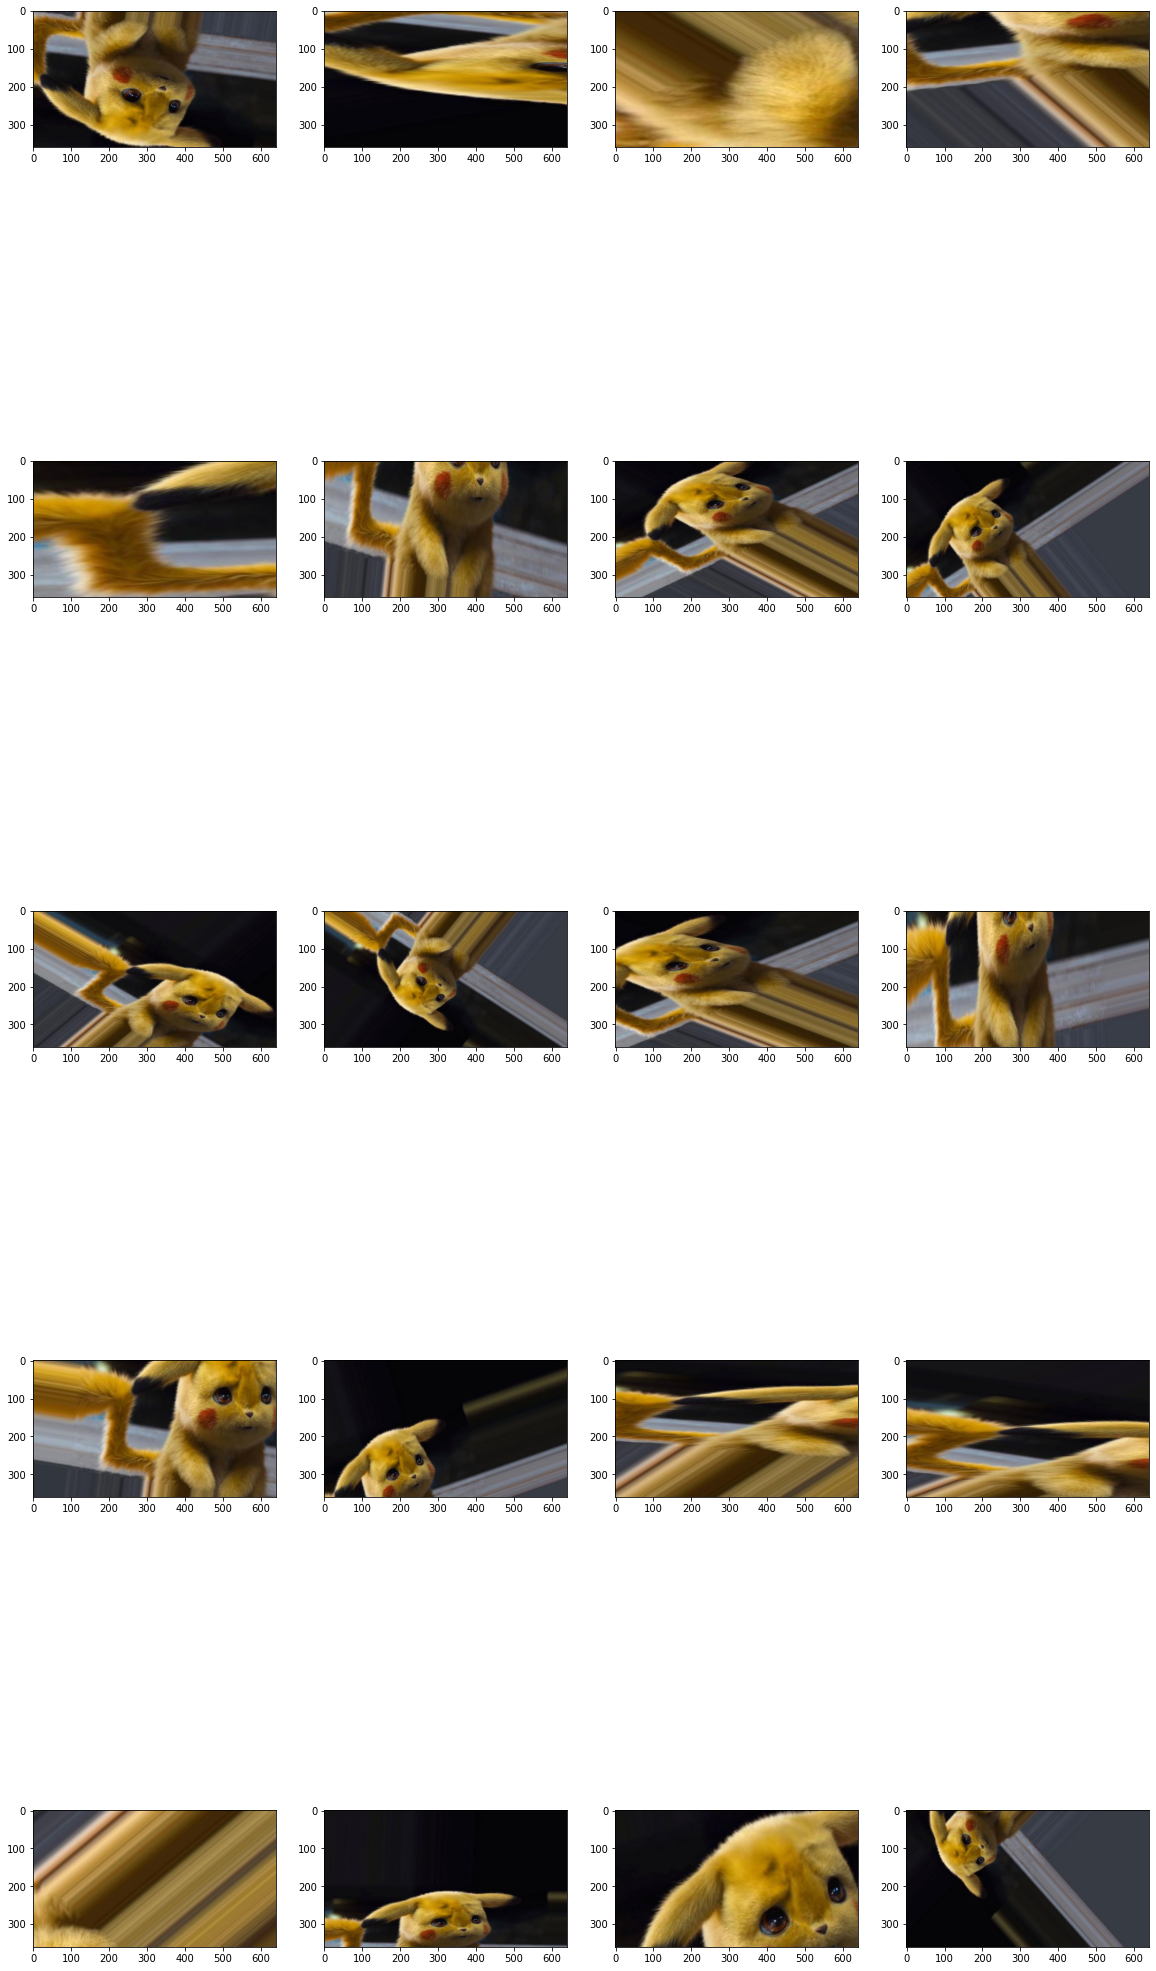

In [18]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)